In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

In [42]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [45]:
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [46]:
train_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [47]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age']).mean()

In [48]:
most_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(most_embarked)

In [49]:
train_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [50]:
test_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [51]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age']).mean()

In [52]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare']).mean()

In [53]:
test_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


<Axes: >

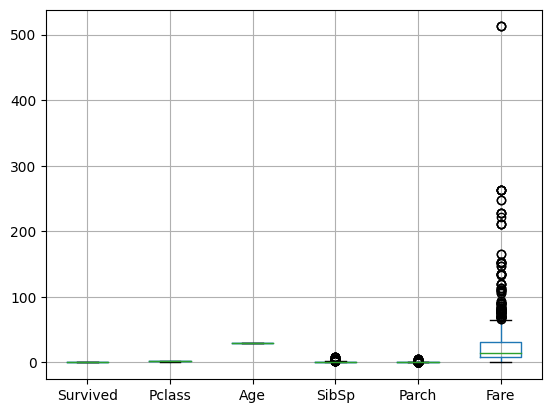

In [54]:
train_df.boxplot()

In [55]:
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_df = train_df[(train_df['Fare'] >= lower_bound) & (train_df['Fare'] <= upper_bound)]

<Axes: >

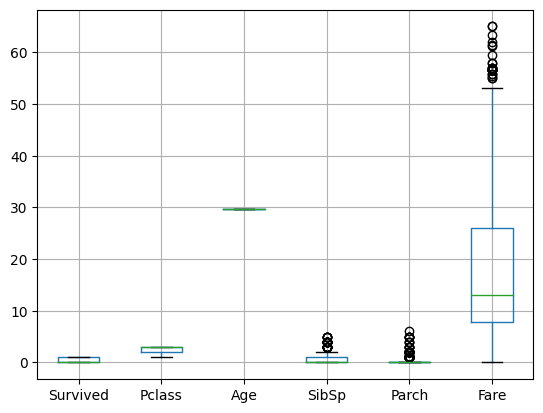

In [56]:
train_df.boxplot()

<Axes: >

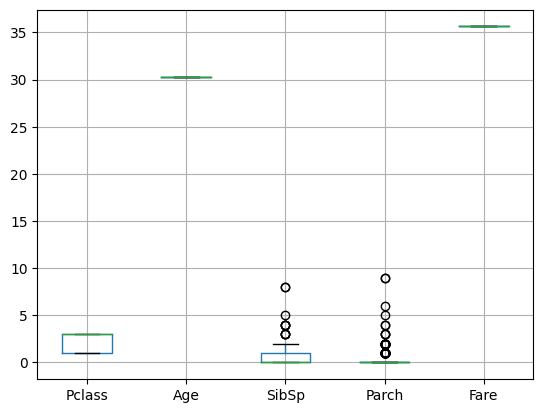

In [57]:
test_df.boxplot()

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

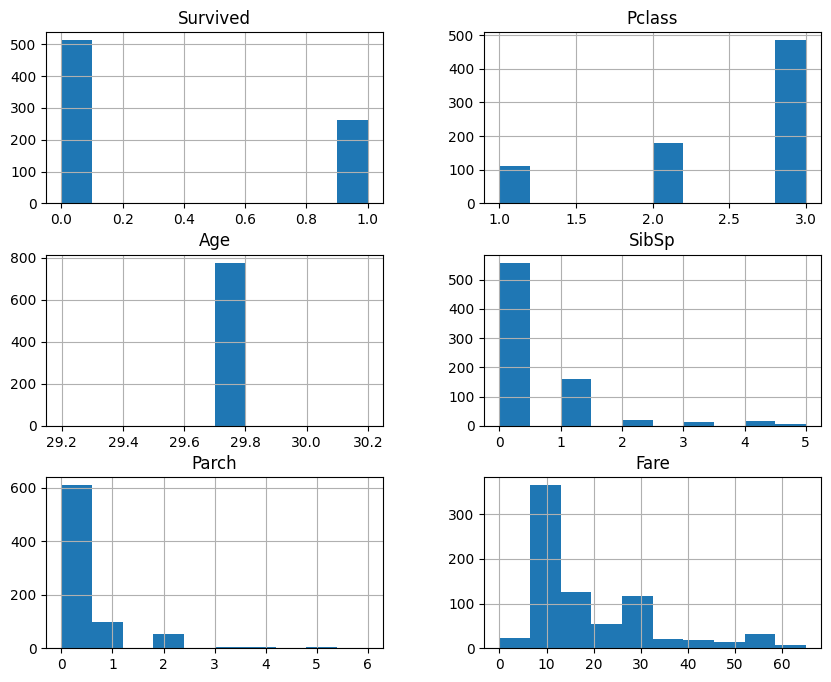

In [58]:
train_df.hist(figsize=(10,8))

In [59]:
train_df['Embarked'].value_counts()

,count
Embarked,
S,584
C,116
Q,75


In [60]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

o_encoder = OneHotEncoder(sparse_output=False)
l_encoder = LabelEncoder()

train_df['Sex'] = o_encoder.fit_transform(train_df[['Sex']])
train_df['Embarked'] = l_encoder.fit_transform(train_df[['Embarked']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,29.699118,1,0,7.2500,2
2,1,3,1.0,29.699118,0,0,7.9250,2
3,1,1,1.0,29.699118,1,0,53.1000,2
4,0,3,0.0,29.699118,0,0,8.0500,2
5,0,3,0.0,29.699118,0,0,8.4583,1


In [62]:
test_df['Sex'] = o_encoder.fit_transform(test_df[['Sex']])
test_df['Embarked'] = l_encoder.fit_transform(test_df[['Embarked']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0.0,30.27259,0,0,35.627188,1
1,3,1.0,30.27259,1,0,35.627188,2
2,2,0.0,30.27259,0,0,35.627188,1
3,3,0.0,30.27259,0,0,35.627188,2
4,3,1.0,30.27259,1,1,35.627188,2


In [64]:
x_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
x_test = test_df.copy()

In [65]:
x_train.head(), y_train.head()

(   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 0       3  0.0  29.699118      1      0   7.2500         2
 2       3  1.0  29.699118      0      0   7.9250         2
 3       1  1.0  29.699118      1      0  53.1000         2
 4       3  0.0  29.699118      0      0   8.0500         2
 5       3  0.0  29.699118      0      0   8.4583         1,
 0    0
 2    1
 3    1
 4    0
 5    0
 Name: Survived, dtype: int64)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [69]:
x_train.head(), x_val.head(), y_train.head(), y_val.head()

(     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 147       3  1.0  29.699118      2      2  34.3750         2
 868       3  0.0  29.699118      0      0   9.5000         2
 60        3  0.0  29.699118      0      0   7.2292         0
 468       3  0.0  29.699118      0      0   7.7250         1
 777       3  1.0  29.699118      0      0  12.4750         2,
      Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 493       1  0.0  29.699118      0      0  49.5042         0
 821       3  0.0  29.699118      0      0   8.6625         2
 381       3  1.0  29.699118      0      2  15.7417         0
 881       3  0.0  29.699118      0      0   7.8958         2
 420       3  0.0  29.699118      0      0   7.8958         0,
 147    0
 868    0
 60     0
 468    0
 777    1
 Name: Survived, dtype: int64,
 493    0
 821    1
 381    1
 881    0
 420    0
 Name: Survived, dtype: int64)

In [71]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [72]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [73]:
y_pred = log_reg.predict(x_val)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [75]:
accuracy_score(y_val, y_pred)

0.7548387096774194

In [76]:
confusion_matrix(y_val, y_pred)

array([[79, 16],
       [22, 38]])

In [77]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        95
           1       0.70      0.63      0.67        60

    accuracy                           0.75       155
   macro avg       0.74      0.73      0.74       155
weighted avg       0.75      0.75      0.75       155



In [78]:
from sklearn.metrics import roc_auc_score, roc_curve

In [79]:
roc_auc_score(y_val, y_pred)

0.7324561403508772

In [80]:
y_prob = log_reg.predict_proba(x_val)[:, 1]

In [81]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = roc_auc_score(y_val, y_prob)

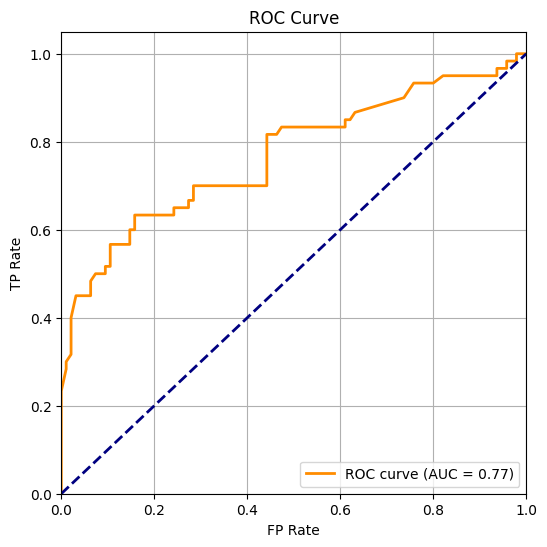

In [84]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [85]:
coefficients = log_reg.coef_[0]
feature_names = x_train.columns

In [86]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

In [87]:
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient')

coef_df

,Feature,Coefficient
1,Sex,2.600954
0,Pclass,-0.778676
3,SibSp,-0.323357
6,Embarked,-0.220796
4,Parch,-0.042961
2,Age,0.015226
5,Fare,0.012993


In [88]:
import pickle

In [90]:
with open('log_reg.pkl', 'wb') as f:
  pickle.dump(log_reg, f)